<a href="https://colab.research.google.com/github/johnreyes96/modeling-and-simulation/blob/master/src/main/python/SpaceshipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tabla de contenido:**
* Introducción
* Nave espacial titánica
* Importar bibliotecas
* Obtener los datos
* Exploración/análisis de datos
* Preprocesamiento de datos
    - Datos Faltantes
    - Creación de nuevas características
    - Funciones de conversión
    - Creación de categorías
* Construcción de modelos de aprendizaje automático

# **Introducción**

Predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía del espacio-tiempo. Para ayudarlo a hacer estas predicciones, se le proporciona un conjunto de registros personales recuperados del sistema informático dañado del barco.

# **Nave espacial titánica**

Bienvenido al año 2912, en el que se necesitan tus conocimientos de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.
La nave espacial Titanic era un transatlántico interestelar de pasajeros lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave partió en su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan alrededor de estrellas cercanas.
Mientras rodeaba Alfa Centauri de camino a su primer destino, el tórrido 55 Cancri E, la incauta nave espacial Titanic colisionó con una anomalía del espacio-tiempo oculta en una nube de polvo. Desgraciadamente, tuvo un destino similar al de su homónima de 1000 años antes. Aunque la nave permaneció intacta, casi la mitad de los pasajeros fueron transportados a una dimensión alternativa.
Para ayudar a las tripulaciones de rescate y recuperar a los pasajeros perdidos, se te desafía a predecir qué pasajeros fueron transportados por la anomalía utilizando los registros recuperados del sistema informático dañado de la nave espacial.

# **Importar bibliotecas**

In [269]:
# data processing
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# **Obtener los datos**

In [300]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [301]:
cd /content/drive/MyDrive/modeling_and_simulation

/content/drive/MyDrive/modeling_and_simulation


In [302]:
test_df = pd.read_csv("test_titanic.csv")
train_df = pd.read_csv("train_titanic.csv")

# **Exploración/análisis de datos**

In [303]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**El conjunto de entrenamiento tiene 8693 ejemplos, 13 características + la variable objetivo (Transported)**. 6 de las características son flotantes, 7 son objetos y un booleano. A continuación las características con su descripción:

    PassengerId:  Un Id único para cada pasajero. gggg_pp donde gggg(grupo con el que viaja el pasajero) y pp(# dentro del grupo).
                  Las personas en un grupo a menudo son miembros de la familia, pero no siempre.
    HomePlanet:   El planeta del que partió el pasajero.
    CryoSleep:    Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje.
                  Los pasajeros en criosueño están confinados en sus cabinas.
    Cabin:        # de cabina donde se hospeda el pasajero. deck/num/side, donde side = P(Babor) o S(Estribor).
    Destination:  El planeta al que desembarcará el pasajero.
    Age:          La edad del pasajero.
    VIP:          Si el pasajero ha pagado por servicio VIP especial durante el viaje.
    RoomService:  Monto que el pasajero ha facturado en el servicio.
    FoodCourt:    Monto que el pasajero ha facturado en el servicio.
    ShoppingMall: Monto que el pasajero ha facturado en el servicio.
    Spa:          Monto que el pasajero ha facturado en el servicio.
    VRDeck:       Monto que el pasajero ha facturado en el servicio.
    Name:         El nombre y apellido del pasajero.
    Transported:  Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que está tratando de predecir.

In [304]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Arriba podemos ver que las edades de **los pasajeros oscilan entre 0 y 79 años**. Además de eso, ya podemos detectar 2 características que tienen sus valores completos, como 'Id del pasajero' y 'Transportado'.

In [305]:
train_df.head(17)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


De la tabla anterior, podemos notar algunas cosas. En primer lugar, **necesitamos convertir muchas funciones en funciones numéricas** más adelante, para que los algoritmos de aprendizaje automático puedan procesarlas. Además, podemos ver que las **características tienen rangos muy diferentes**, que necesitaremos convertir aproximadamente a la misma escala. También podemos detectar algunas características más, que contienen valores faltantes (NaN).

**Detallando los datos que realmente faltan:**

In [306]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum() / train_df.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(14)

,Total,%
CryoSleep,217,2.5
ShoppingMall,208,2.4
VIP,203,2.3
HomePlanet,201,2.3
Name,200,2.3
Cabin,199,2.3
VRDeck,188,2.2
FoodCourt,183,2.1
Spa,183,2.1
Destination,182,2.1


Las 12 funciones oscilan entre 179 y 217 valores faltantes, algunas que se pueden completar fácilmente, otras más difíciles como 'HomePlanet' y 'Destination', por tal motivo sus valores 'NaN' serán reemplazados por 'Unknown', esto con el fin de identificar, si los pasajeros transportados tienen en común su planeta de origen y/o destino. Por otro lado, la función "Name" podríamos eliminarla del conjunto de datos, ya que no aportaría valor alguno.

In [307]:
train_df.columns.values

array(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported'], dtype=object)

Arriba puede ver las 13 características + la variable de destino (Transported). **¿Qué características podrían contribuir a una alta tasa de transportados a una dimensión alternativa?**

Para nosotros tendría sentido todos, menos 'Name', por los demás, se correlacionaran con una alta tasa de transportados a una dimensión alternativa.

**1. Age:**

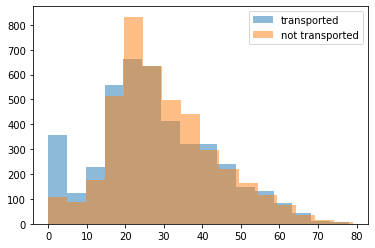

In [308]:
# Leyendas
transported = 'transported'
not_transported = 'not transported'

# Datos de entretamiento
age = train_df

# Generar gráfica
plt.hist(age[age['Transported']==1].Age.dropna(), bins = 16, alpha = 0.5, label = transported)
plt.hist(age[age['Transported']==0].Age.dropna(), bins = 16, alpha = 0.5, label = not_transported)
plt.legend(loc='upper right')
plt.show()

Puede ver que hay una alta probabilidad de ser transportado a una dimensión alternativa cuando tienen entre 0 y 5 años, el resto de las edades no hay un factor común el cual sean más atrayentes unas edades que otras para ser transportados.

Dado que para **el rango 0-5 años, tienen mayores probabilidades de ser transportados a una dimensión alternativa** y como queremos que todas las características estén aproximadamente en la misma escala, lo más seguro es que para la función 'Edad' no se creen grupos de edad más adelante.

**2. VIP:**

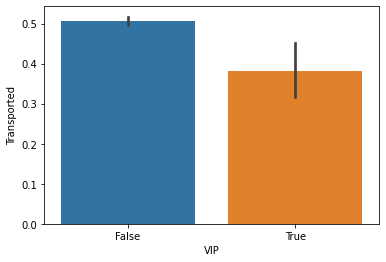

In [309]:
sns.barplot(x='VIP', y='Transported', data=train_df)

**3. CryoSleep:**

Aquí vemos que VIP está contribuyendo la posibilidad de un pasajero ser transportado a una dimensión alternativa, especialmente si esta persona no es VIP.

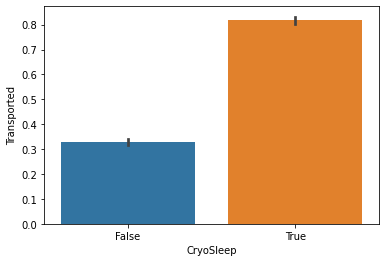

In [310]:
sns.barplot(x='CryoSleep', y='Transported', data=train_df)

Aquí vemos claramente que CryoSleep está contribuyendo la posibilidad de un pasajero ser transportado a una dimensión alternativa, especialmente si esta persona eligió ser puesto en animación suspendida durante la duración del viaje.

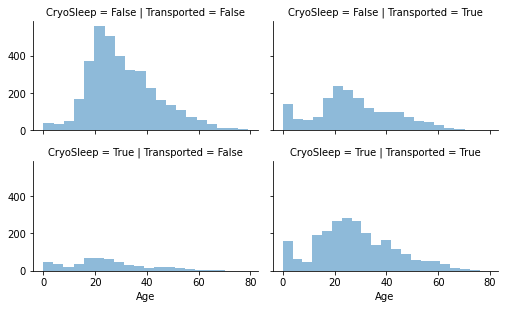

In [311]:
grid = sns.FacetGrid(train_df, col='Transported', row='CryoSleep', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

El gráfico anterior confirma la suposición sobre CryoSleep, pero también podemos detectar una alta probabilidad de que una persona que no sea CryoSleep, no sea transportada a una dimensión alternativa.

**4. HomePlanet:**

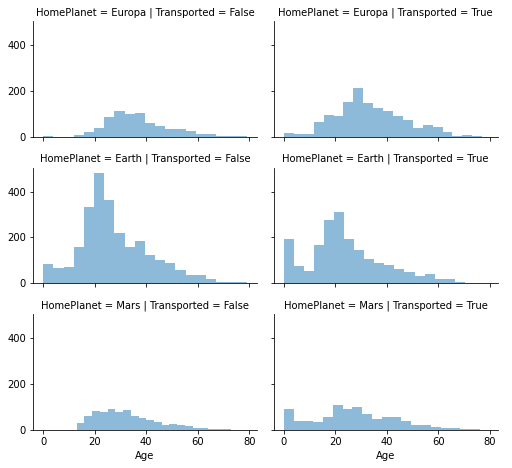

In [312]:
grid = sns.FacetGrid(train_df, col='Transported', row='HomePlanet', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

El gráfico anterior confirma la suposición sobre el rango 0-5 años, pero también podemos detectar que casi todos los pasajeros provenientes del satélite Europa y planeta Marte en el rango de 0-10 años fueron transportados a una dimensión alternativa y en su gran mayoría los que nos fueron transportados son provenientes del planeta Tierra.

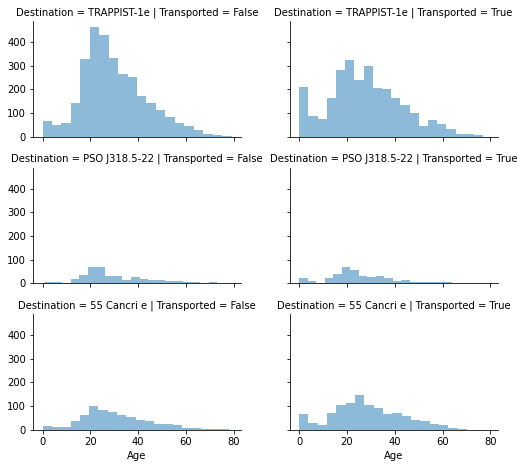

In [313]:
grid = sns.FacetGrid(train_df, col='Transported', row='Destination', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Podemos detectar que la gran mayoría de los pasajeros que fueron transportados a una dimensión alternativa tenían como destino al exoplaneta TRAPPIST-1e.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


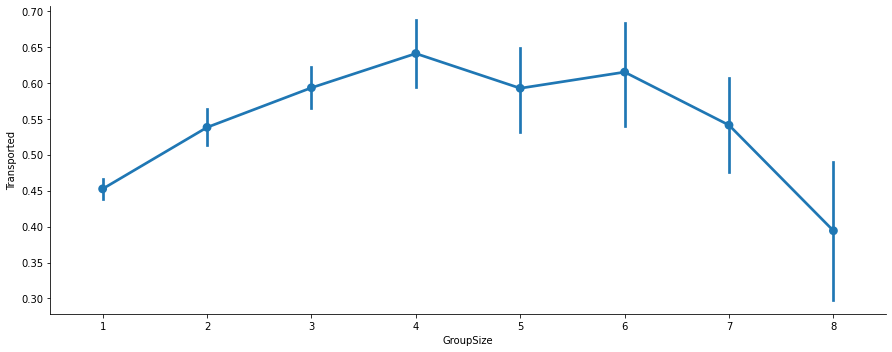

In [314]:
# Datos de entretamiento
groups = train_df.copy(deep=True)

'''
Adding 4 columns (IDGroup, NumberInGroup, GroupSize, 'IsGroup') from the input ID_Column
'''
# IDPrefix & NumberInGroup
groups[['IDGroup', 'NumberInGroup']] = groups['PassengerId'].str.split('_', expand=True)
groups[['IDGroup', 'NumberInGroup']] = groups[['IDGroup', 'NumberInGroup']].astype(int)

#GroupSize & IsGroup
group_sizes = pd.DataFrame(groups['IDGroup'].value_counts(dropna=False).sort_index())
group_sizes.rename(columns={'IDGroup' : 'GroupSize'}, inplace=True)
group_sizes['IDGroup'] = group_sizes.index

groups['GroupSize'] = groups.merge(group_sizes, on = 'IDGroup', how='left')['GroupSize']

groups['IsGroup'] = groups['GroupSize'] > 1
groups['IsGroup'] = groups['IsGroup'].astype(int)

# Generar gráfica
axes = sns.factorplot('GroupSize','Transported', data=groups, aspect = 2.5)

Aquí podemos ver que tenían una alta probabilidad de ser transportados a una dimensión alternativa los pasajeros que pertenecian a un grupo (salvo los casos de los grupos de 8 personas) a comparación del pasajero que venía solo.

# **Preprocesamiento de datos**

## Datos Faltantes
### Cabin:
A los pasajeros que no tienen valor en la columna 'Cabin' son filas random, es decir, los 199 registros no son consecutivos, a estos, se les asignará el valor de la cabina del pasajero siguiente del dataframe.

In [315]:
# Datos de entrenamiento y de pruebas
data = [train_df, test_df]

for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna(method='bfill')

### HomePlanet y Destination:
Dado que las funciones HomePlanet y Destination solo tienen 3 valores únicos, los completaremos con el más común.

In [316]:
train_df[['HomePlanet','Destination']].describe()

,HomePlanet,Destination
count,8492,8511
unique,3,3
top,Earth,TRAPPIST-1e
freq,4602,5915


In [317]:
common_origin = 'Earth'
common_destination = 'TRAPPIST-1e'
data = [train_df, test_df]

for dataset in data:
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna(common_origin)
    dataset['Destination'] = dataset['Destination'].fillna(common_destination)

### CryoSleep y VIP:
Dado que las funciones CryoSleep y VIP son datos booleanos, los completaremos con el más común.

In [318]:
train_df[['CryoSleep','VIP']].describe()

,CryoSleep,VIP
count,8476,8490
unique,2,2
top,False,False
freq,5439,8291


In [319]:
common_value = False
data = [train_df, test_df]

for dataset in data:
    dataset['CryoSleep'] = dataset['CryoSleep'].fillna(common_value)
    dataset['VIP'] = dataset['VIP'].fillna(common_value)

### RoomService, FoodCourt, ShoppingMall, Spa y VRDeck:
Dado que las funciones RoomService, FoodCourt, ShoppingMall, Spa y VRDeck son montos que el pasajero ha facturado en cada uno de los servicios de lujo, los completaremos con 0.

In [320]:
zero = 0
data = [train_df, test_df]

for dataset in data:
    dataset['RoomService'] = dataset['RoomService'].fillna(zero)
    dataset['FoodCourt'] = dataset['FoodCourt'].fillna(zero)
    dataset['ShoppingMall'] = dataset['ShoppingMall'].fillna(zero)
    dataset['Spa'] = dataset['Spa'].fillna(zero)
    dataset['VRDeck'] = dataset['VRDeck'].fillna(zero)

### Name:
Dado que el Name no lo usaremos para los modelos de aprendizaje automático, lo eliminaremos del dataframe.

In [321]:
data = [train_df, test_df]

for dataset in data:
  dataset.drop(columns = 'Name', inplace=True)

### Age:

Ahora podemos abordar el problema con los valores faltantes de las características de 'Edad'. Se crea una matriz que contenga números aleatorios, que se calculan en función del valor de la edad media con respecto a la desviación estándar y is_null.

In [322]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # Números aleatorios entre la media, desviación estándar y is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # Llenamos los valores nulo en la columna Age con valores aleatorios generados
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

## Creación de nuevas características

Agregar 7 características nuevas al conjunto de datos, que se calcula a partir de otras características.

### 1. IDGroup, NumberInGroup, GroupSize y 'IsGroup'

In [323]:
# Datos de entrenamiento y de pruebas
data = [train_df, test_df]

for dataset in data:
  '''
  Se añaden 4 columnas (IDGroup, NumberInGroup, GroupSize, 'IsGroup') de la columna 'PassengerId'
  '''
  # IDPrefix & NumberInGroup
  dataset[['IDGroup', 'NumberInGroup']] = dataset['PassengerId'].str.split('_', expand=True)
  dataset[['IDGroup', 'NumberInGroup']] = dataset[['IDGroup', 'NumberInGroup']].astype(int)

  #GroupSize & IsGroup
  group_sizes = pd.DataFrame(dataset['IDGroup'].value_counts(dropna=False).sort_index())
  group_sizes.rename(columns={'IDGroup' : 'GroupSize'}, inplace=True)
  group_sizes['IDGroup'] = group_sizes.index

  dataset['GroupSize'] = dataset.merge(group_sizes, on = 'IDGroup', how='left')['GroupSize']

  dataset['IsGroup'] = dataset['GroupSize'] > 1
  dataset['IsGroup'] = dataset['IsGroup'].astype(int)

### 2. CabinDeck, CabinNumber, CabinSide

In [324]:
# Datos de entrenamiento y de pruebas
data = [train_df, test_df]

for dataset in data:
  '''
  Divide el texto de descripción de 'Cabin' en 3 características diferentes,
  rellenando los valores de NaN donde sea necesario.
  '''
  # Dividir la columna Cabin en 3 nuevas
  dataset[['CabinDeck','CabinNumber','CabinSide']] = dataset['Cabin'].str.split('/', expand=True)
  
  # Conviertiendo el tipo de dato
  dataset[['CabinDeck', 'CabinSide']] = dataset[['CabinDeck','CabinSide']].astype(str)
  dataset['CabinNumber'] = dataset['CabinNumber'].astype(int)
  
  # Se elimina la columna Cabin ya que no nos es útil para los modelos de aprendizaje automático
  dataset.drop(columns = 'Cabin', inplace=True)

## Funciones de conversión

Primero, eliminar 'PassengerId' del conjunto de train, porque no contribuye a la probabilidad de supervivencia de una persona. No se eliminara del conjunto de prueba, ya que se requiere allí para el envío.

In [325]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [326]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8693 non-null   object 
 1   CryoSleep      8693 non-null   bool   
 2   Destination    8693 non-null   object 
 3   Age            8693 non-null   int64  
 4   VIP            8693 non-null   bool   
 5   RoomService    8693 non-null   float64
 6   FoodCourt      8693 non-null   float64
 7   ShoppingMall   8693 non-null   float64
 8   Spa            8693 non-null   float64
 9   VRDeck         8693 non-null   float64
 10  Transported    8693 non-null   bool   
 11  IDGroup        8693 non-null   int64  
 12  NumberInGroup  8693 non-null   int64  
 13  GroupSize      8693 non-null   int64  
 14  IsGroup        8693 non-null   int64  
 15  CabinDeck      8693 non-null   object 
 16  CabinNumber    8693 non-null   int64  
 17  CabinSide      8693 non-null   object 
dtypes: bool(

## Creación de categorías

Ahora crearemos categorías dentro de las siguientes características:



# Construcción de modelos de aprendizaje automático

In [327]:
train_df.head(17)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,IDGroup,NumberInGroup,GroupSize,IsGroup,CabinDeck,CabinNumber,CabinSide
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False,1,1,1,0,B,0,P
1,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True,2,1,1,0,F,0,S
2,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,False,3,1,2,1,A,0,S
3,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,False,3,2,2,1,A,0,S
4,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,True,4,1,1,0,F,1,S
5,Earth,False,PSO J318.5-22,44,False,0.0,483.0,0.0,291.0,0.0,True,5,1,1,0,F,0,P
6,Earth,False,TRAPPIST-1e,26,False,42.0,1539.0,3.0,0.0,0.0,True,6,1,2,1,F,2,S
7,Earth,True,TRAPPIST-1e,28,False,0.0,0.0,0.0,0.0,0.0,True,6,2,2,1,G,0,S
8,Earth,False,TRAPPIST-1e,35,False,0.0,785.0,17.0,216.0,0.0,True,7,1,1,0,F,3,S
9,Europa,True,55 Cancri e,14,False,0.0,0.0,0.0,0.0,0.0,True,8,1,3,1,B,1,P


In [328]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8693 non-null   object 
 1   CryoSleep      8693 non-null   bool   
 2   Destination    8693 non-null   object 
 3   Age            8693 non-null   int64  
 4   VIP            8693 non-null   bool   
 5   RoomService    8693 non-null   float64
 6   FoodCourt      8693 non-null   float64
 7   ShoppingMall   8693 non-null   float64
 8   Spa            8693 non-null   float64
 9   VRDeck         8693 non-null   float64
 10  Transported    8693 non-null   bool   
 11  IDGroup        8693 non-null   int64  
 12  NumberInGroup  8693 non-null   int64  
 13  GroupSize      8693 non-null   int64  
 14  IsGroup        8693 non-null   int64  
 15  CabinDeck      8693 non-null   object 
 16  CabinNumber    8693 non-null   int64  
 17  CabinSide      8693 non-null   object 
dtypes: bool(